In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def relu(x):
    return np.max(0, x)

def relu_prime(x):
    return np.where(x <= 0, 0, 1)

def id(x):
    return x

def id_prime(x):
    return np.zeros(x.shape)

def mse(x, x_hat, ax=None):
    assert x.shape == x_hat.shape
    return np.square(x - x_hat).mean(axis=ax)

In [4]:
df = pd.read_csv("./dataset.csv")
X, Y = df['x'].to_numpy(), df['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

## MMSE

In [5]:
def mmse(xs, ys):
    assert xs.shape == ys.shape

    x_sq = np.square(xs).sum()
    x = np.sum(xs)
    n = np.size(xs)
    xy = np.dot(xs, ys).sum()
    y = np.sum(ys)

    A = np.array([[x_sq, x], [x, n]])
    B = np.array([xy, y])

    return np.linalg.inv(A) @ B.T
    

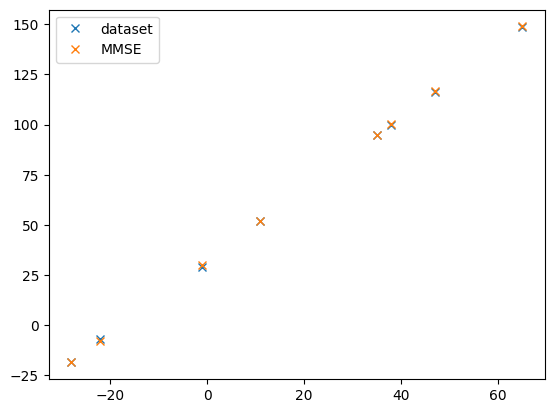

0.25711730986348513


In [6]:
coeff = mmse(X_train, y_train)

poly = np.poly1d(coeff)
y_hat = poly(X_test)

plt.plot(X_test, y_test, "x", label="dataset")
plt.plot(X_test, y_hat, "x", label="MMSE")
plt.legend()
plt.show()

print(mse(y_test, y_hat))

## GD

In [21]:
np.random.seed(42)

EPOCHS, ETA = 1000, 0.0003

w, b = np.random.rand(2)
errors = []

for i in tqdm(range(EPOCHS)):
    for x, y in zip(X_train, y_train):
        y_hat = w * x + b
        error = y - y_hat

        w += ETA * x * error
        b += ETA * error

    errors.append(mse(y, y_hat))

print(w, b)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 27209.41it/s]

1.7934835982758635 32.0387082714201


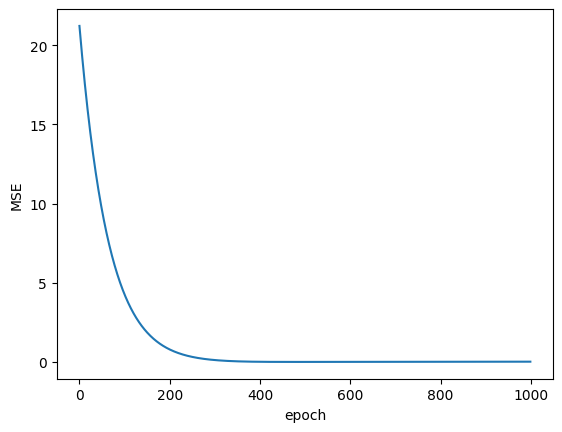

In [23]:
plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

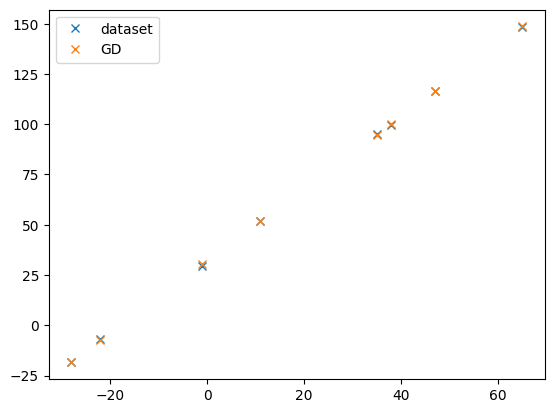

0.22292456795120383


In [24]:
poly = np.poly1d([w, b])
y_hat = poly(X_test)

plt.plot(X_test, y_test, "x", label="dataset")
plt.plot(X_test, y_hat, "x", label="GD")
plt.legend()
plt.show()

print(mse(y_test, y_hat))